# Bank Institution Term Deposit Predictive Model

**Client : Bank of Portugal**

### Business Need
The investment and portfolio department for Bank of Portugal wants to be able to identify the customers who potentially would subscribe to term deposits. There has been heightened interest of marketing managers to carefully tune their directed campaigns to the rigorous selection of contacts, therefore, the goal of the employer (Bank of Portugal) is to find an effective model that can predict which future clients would subscribe to their term deposits.

**Why do we need an effective predictive model?**

An effective predictive model can help increase the campaign efficiency as they would be able to identify customers who would subscribe to their term deposit, therby direct their marketing efforts to them. Additionally the model will help them better manage their resources (human effort, phone calls, time, etc.)

The Bank of Portugal, therefore, collected a huge amount of data that includes customer profiles of those who have subscribed to term deposits and the ones who did not subscribe to a term deposit to be used as basis for analysis.

To come up with an effective predictive model, this project will cover:
1. [Data Exploration]()
2. [Data Cleaning]()
3. [Feature Extraction]() and
4. [Development of Robust Machine Learning Algorithms]()

First, we access and understand the features of our data.

### Data and Features
The data for this project is a 20 features and one target variable dataset found [here](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data source has multiple datasets but we will be using the bank-additional-full.csv found [here](http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip) dataset.

The 20 features in our dataset are equally distributed into categorical and numerical features, i.e. 10 categorical features and 10 numerical features.

**Categorical Features:**

1. *job* - type of job of customer ('admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
2. *marital* - marital status of a customer ('divorced', 'married', 'single', 'unknown')
3. *education* - education level of the customer ('basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
4. *default* - whether the customer has credit in default ('no', 'yes', 'unknown')
5. *housing* - whether customer has housing loan ('no', 'yes', 'unknown')
6. *loan* - whether customer has personal loan ('no', 'yes', 'unknown')
7. *contact* - contact communication type ('cellular', 'telephone')
8. *month* - last contact month of year
9. *day_of_week* - last contact day of the week ('mon',...,'fri')
10. *poutcome* - outcome of the previous marketing campaign ('failure', 'nonexistent', 'success')

**Numerical Features:**

1. *age* - age of customer
2. *duration* - last contact duration, in seconds. It is also, important to note that this feature has been stated to highly affect the output target directly. We will therefore, just include it for benchmark purpose but discard it to have a realistic predictive model.
3. *campaign* - number of contacts performed during this campaign and for a specific customer.
4. *pdays* - number of days that passed by after the client was last contacted from a previous campaign. (999 means a customer wan not previously contacted)
5. *previous* - number of contacts performed before this campaign and for this customer.
6. *emp.var.rate* - employment variation rate (quarterly indicator)
7. *cons.price.idx* - consumer price index (monthly indicator)
8. *cons.conf.idx* - consumer confidence index (monthly indicator)
9. *euribor3m* - euribor 3 month rate (daily indicator)
10. *nr.employed* - number of employees (quarterly indicator)

**Target Variable**
* *y* - if the client has subscribed for a term deposit ('yes', 'no')

## Data Exploration

In [1]:
#we start by importing necessary libraries to help us explore our data

import pandas as pd
import numpy as np

#we also need libraries to help us visualize our data. We will use Seaborn and Matplotlib for this project.
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#using pandas we read our csv. file and store it in a dataframe for easier exploration and data interaction throughout the project

dataset = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

In [3]:
#the DataFrame.head() function helps us inspect the top 5 rows of our dataset.
#we can therefore, understand how our data looks and the number of columns in our data.


print(dataset.shape)
dataset.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dataset.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [5]:
#next, we look at the distribution of our target variable (Y) to understand if it is balanced or not.
dataset['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

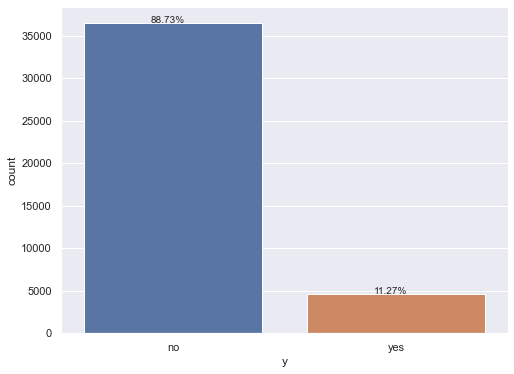

In [6]:
#we can also see the distribution the distribution using visualization (a countplot is used in this case).

total = len(dataset['y'])

plt.figure(figsize=(8,6))
ax = sns.countplot(x='y', data=dataset)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))

plt.show

From the above plot, it is clear that our classes are imbalanced and the ratio of no subscription to subscription is 89:11

Next, we explore the distribution of the categorical features directly relating to the customers. We will use `.mean()` to understand the distribution of the numerical features for the customers' data

In [7]:
#it is easier to define one function to calculate the mean then we will call the function and give it a feature.

def feature_mean(feature):
    '''
    this function takes a feature in the 'dataset' dataframe as an argument,
    and returns the mean of the numerical features in the dataframe grouped by the feature.
    '''
    return dataset.groupby(feature).mean()

In [8]:
feature_mean('job')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [9]:
feature_mean('marital')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


In [10]:
feature_mean('education')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [11]:
feature_mean('default')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
default,,,,,,,,,,
no,39.140635,259.842549,2.520744,954.787130,0.199030,-0.082168,93.525639,-40.565469,3.447246,5159.990214
unknown,43.371990,252.435035,2.745609,991.606258,0.074096,0.703466,93.765365,-40.265139,4.280654,5193.725951
yes,42.333333,103.333333,1.333333,999.000000,0.333333,0.900000,93.362667,-38.066667,4.693000,5217.333333


In [12]:
feature_mean('housing')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
housing,,,,,,,,,,
no,40.044195,260.663677,2.601010,964.559875,0.161153,0.184089,93.624836,-40.337590,3.732474,5170.661857
unknown,39.951515,250.194949,2.560606,964.896970,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273
yes,40.010011,256.603217,2.539071,960.565304,0.182610,-0.007773,93.530456,-40.654811,3.523873,5163.932949


In [13]:
feature_mean('loan')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
loan,,,,,,,,,,
no,40.058822,258.507246,2.561414,962.411841,0.173078,0.080150,93.575402,-40.481284,3.620732,5166.920563
unknown,39.951515,250.194949,2.560606,964.896970,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273
yes,39.846671,258.359315,2.602273,962.437420,0.170455,0.086316,93.567529,-40.652241,3.619294,5167.754369


In [14]:
#we can also, call the above defined function and understand the mean distribution of our target variable.
feature_mean('y')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Univariate and Bivariate analysis of Categorical features

In [15]:
def plot_unibi_cat(feature, col):
    
    uni_title = feature + ' frequency'
    bi_title = 'Cross-tabulation plot of target and ' + feature
    total = len(dataset[feature])
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axes1 = dataset[feature].value_counts().plot(ax=ax[0], kind='bar', title=uni_title)
    axes2 = pd.crosstab(col, dataset.y).plot(ax=ax[1], kind='bar', title=bi_title)
    
    for p in axes1.patches:
        axes1.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0., p.get_height()+5))
    for p in axes2.patches:
        axes2.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0., p.get_height()+5))
    
    plt.show()

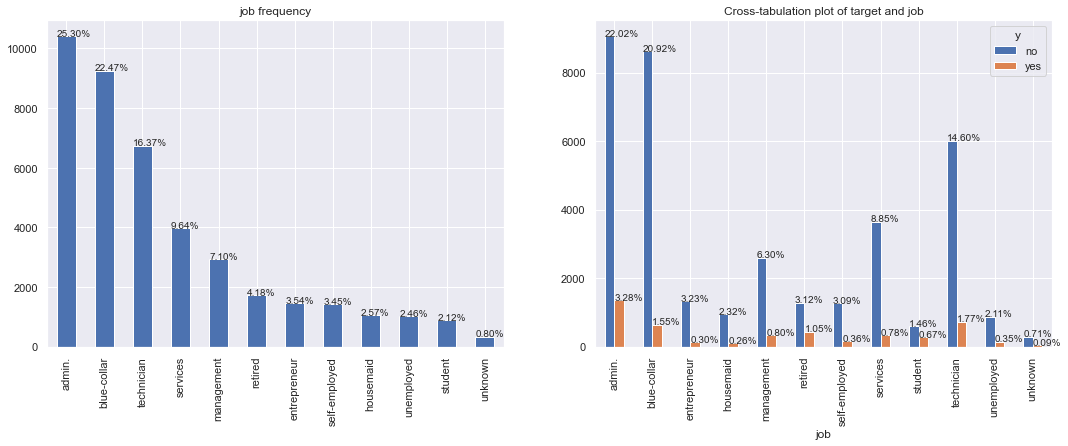

In [16]:
plot_unibi_cat('job', dataset.job)

Most of our customers are working as admins as seen above. This could be the reason for the highest subscription and non-subscription rate form this job category. The subscription rate ranges from 0.26% among housemaids to 3.28% among admins. This shows that the job title of our customer greatly impacts subscription to term deposits. As a result, job can be a good predictor of our target variable.

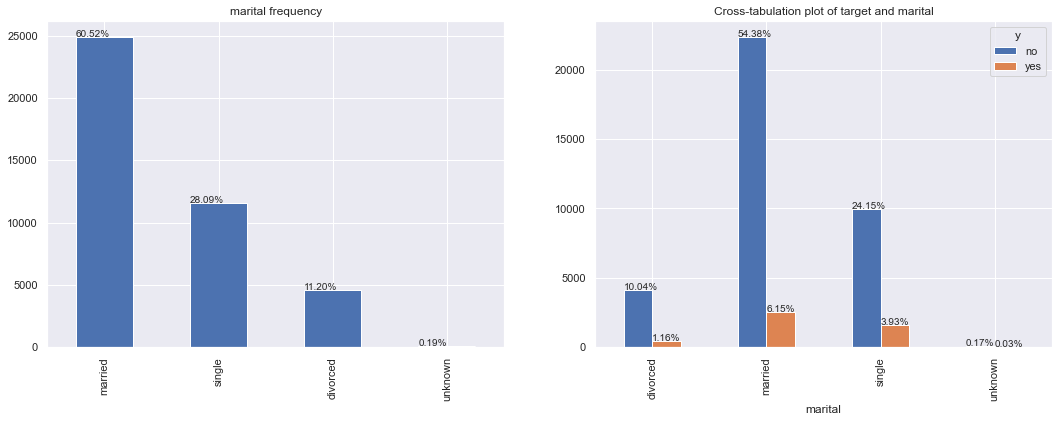

In [17]:
plot_unibi_cat('marital', dataset.marital)

Most of our customers are married followed by single and a small percentage (0.19%) have their marital status as unknown. The percentage of subscription also ranges from 0.03% among the unknown group to 6.15% among the married. This shows that the marital status of our customers also, impacts their subscription to term deposits. Therefore, marital can be a good predictor of our target variable

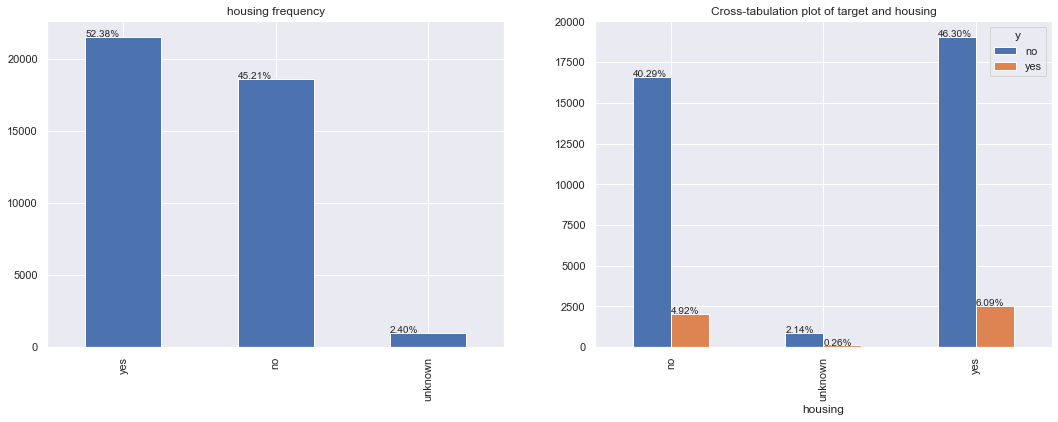

In [18]:
plot_unibi_cat('housing', dataset.housing)

Our customers are almost equally balanced in taking housing loans and not taking housing loans with a small percentage (2.40%) being unknown. The percentage of subscription also ranges from 0.26% among the unknown group to 6.09% among customers with a housing loan. This shows that the housing loan also, impacts the subscription to term deposits. Therefore, housing can be a good predictor of our target variable.

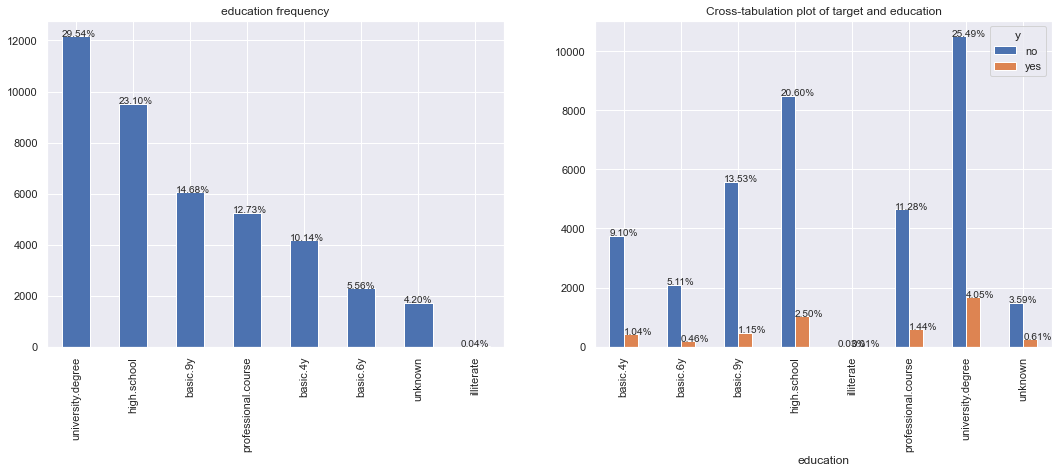

In [19]:
plot_unibi_cat('education', dataset.education)

Most of our customers are learned with the highest percentage (29.54%) of customers having a university degree. Only 0.04% of our customers are illeterate. The percentage of subscription also ranges from 0.01% among the illetrate to 4.05% among the university degree holders. University degree holders also have the highest percentage (25.49%) of no subscriptions. Still, it is clear that the education of the customer impacts the subscription of our customers to term deposits. Therefore, education can be a good predictor of our target variable

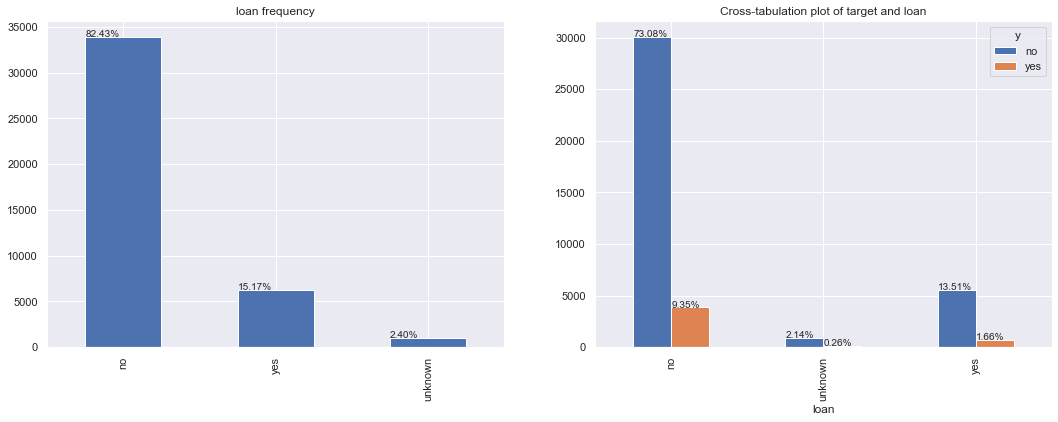

In [20]:
plot_unibi_cat('loan', dataset.loan)

Most of our customers do not have a personal loan and these customers have the highest percentage (9.35%) in subscription to term deposits. Customers with a personal loan have a subscription percentage of only 1.66% and those with unknown status have a percentage of 0.26%. Therefore, loan can be a good predictor of our target variable.

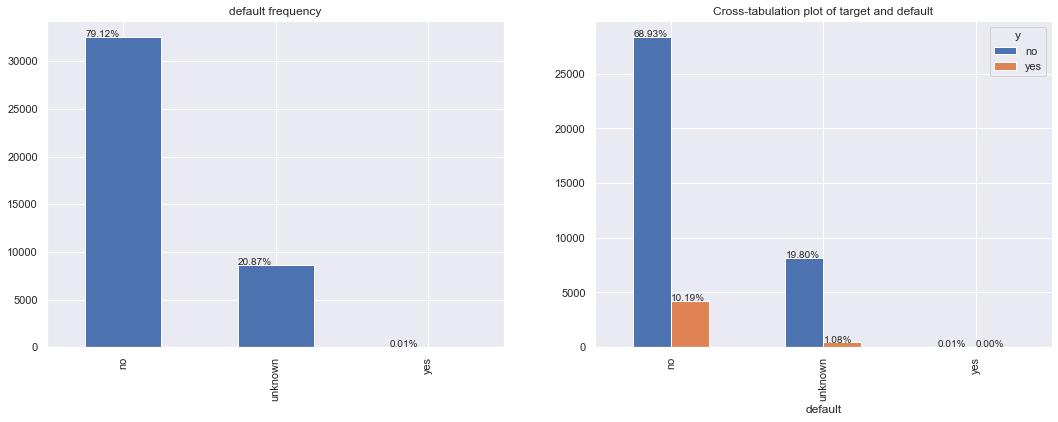

In [21]:
plot_unibi_cat('default', dataset.default)

Most of our customers do not have credit in default and this seems to highly influence their subscription rate. The subscription percentage among this group is 10.19% with the smallest percentage (0.01%) of customers with credit by default all not subscribing to term deposits. Therefore, default can also be a good predictor of our target variable.

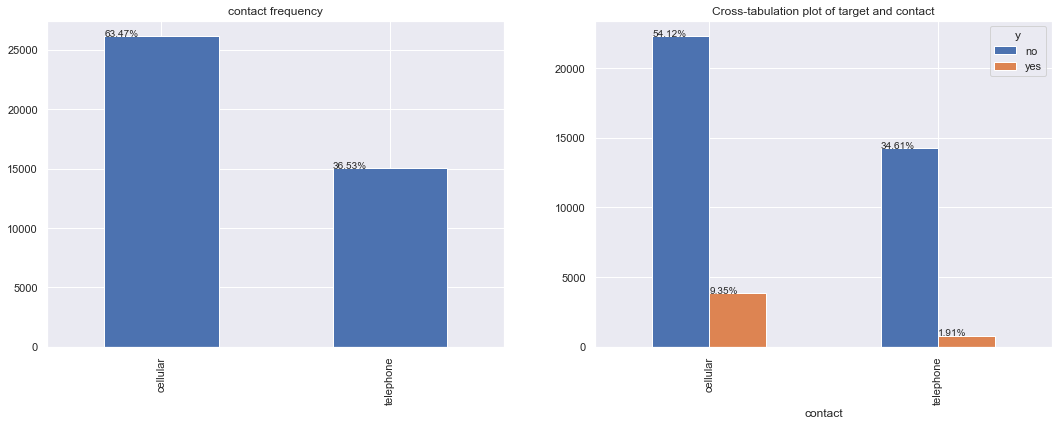

In [22]:
plot_unibi_cat('contact', dataset.contact)

Most of our customers have cellular as their contact communication type. The percentage of subsription in this category is also high at 9.35% compared to those with telephone communication type (1.91%). Contact type thus, can be a good predictor of our target variable

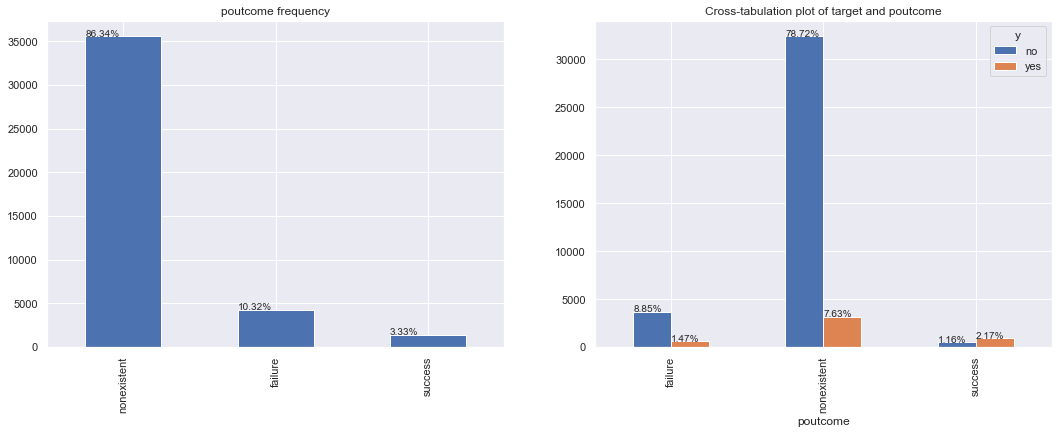

In [23]:
plot_unibi_cat('poutcome', dataset.poutcome)

Most of our customers were not part of the previous campaign, meaning that most of them are new. The customers who had success in their previous campaign have a higher subscription percentage (2.17%) compared to non-subscription percentage (1.16%). The highest percentage of subscription inn this data is however, to the new customers at 7.63%. This feature seems to be a very good indicator of our target variable.

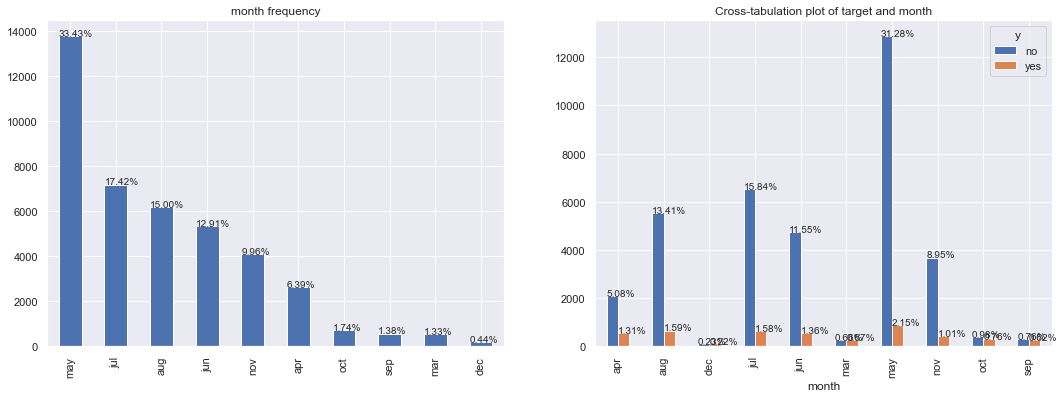

In [24]:
plot_unibi_cat('month', dataset.month)

Most of our customers were last contacted in May and that's the month we had the highest subscription percentage at 2.15%. We also had the highest number of non-subscriptions percentage in the same month at 31.28%. The subscription percentages generally range from 0.22% in decemeber to that of May. This feature can be a good predictor of our target variable.

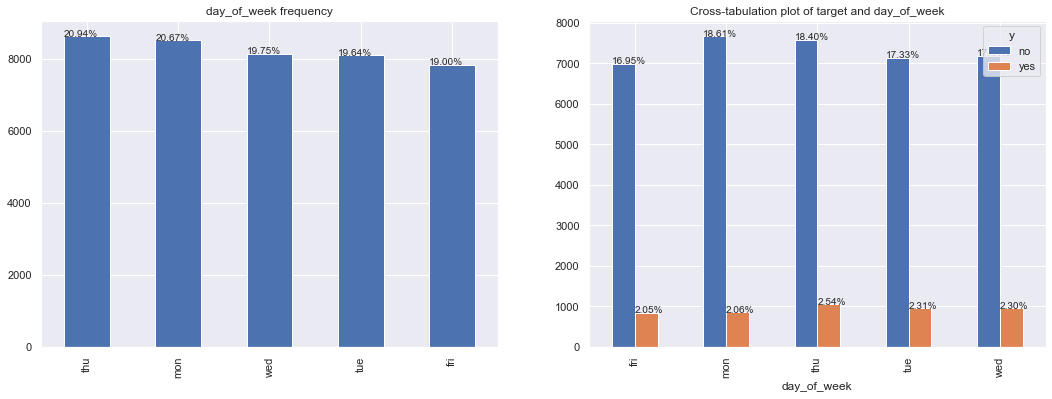

In [25]:
plot_unibi_cat('day_of_week', dataset.day_of_week)

The distribution of our customers across the day_of_week is almost equal as seen the graphs above. Subscription percentage also seems to be equal ranging from 2.06% on Friday to 2.54% on Thursday. This range is small and there seems to be no difference in the day_of_week. As a result, this feature may not be a good predictor of our target variable.

### Univariate and Bivariate analysis of Numerical features
Both pdays and previous features have only one unique values in their columns and we will therefore, not analyse these two features.

In [26]:
def plot_unibi_num(feature): 
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    sns.distplot(dataset[feature], ax=ax[0])
    sns.boxplot(data=dataset, x='y', y=feature, ax=ax[1])   
    
    plt.show()

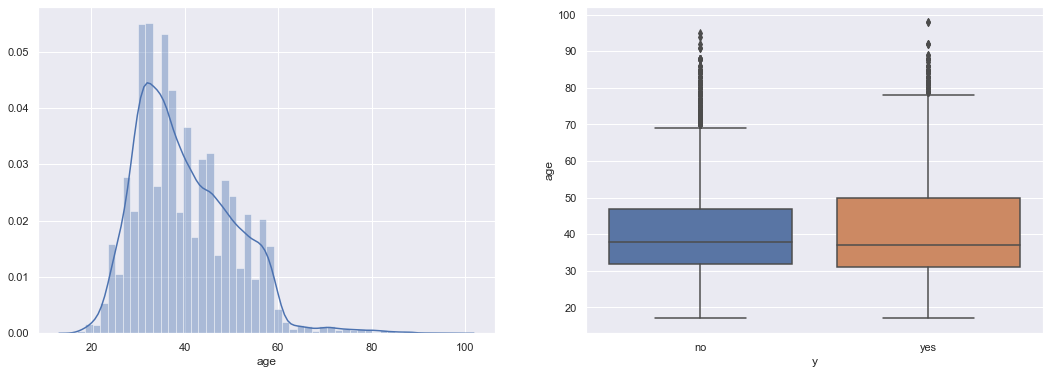

In [27]:
plot_unibi_num('age')

From the above plots, we can see that median age of customers who subscribed or did not subscribe to term deposits is around 38-40. The box plot for the two clases (yes and no) also, overlap a lot. As a result, age may not be a good predictor for which customer wil subscribe and which customer will not.

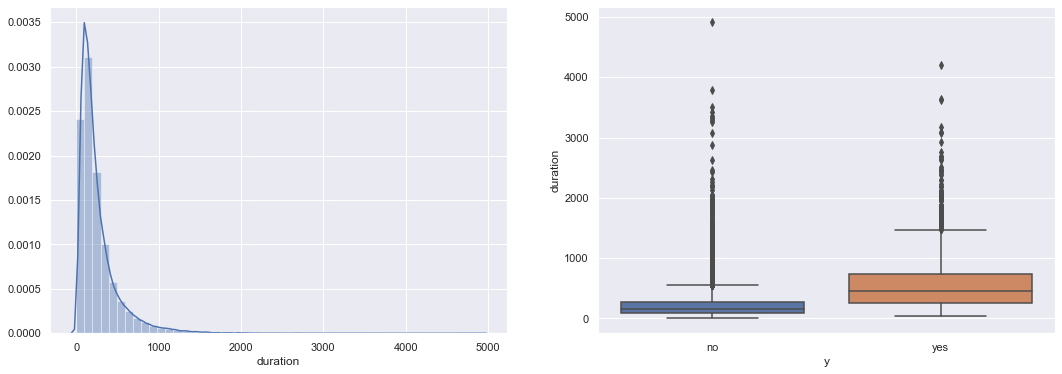

In [28]:
plot_unibi_num('duration')

We already know from our data description that the `duration` feature highly affects the decision of the customer. This is clearly evident from the plots above with the boxplots showing zero overlap among the two classes.

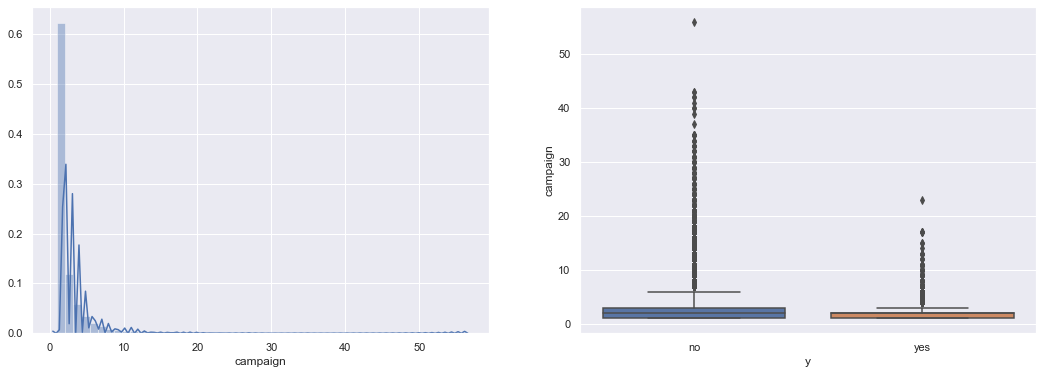

In [29]:
plot_unibi_num('campaign')

From the above plots, campaign can be a good indicator of our target variable.

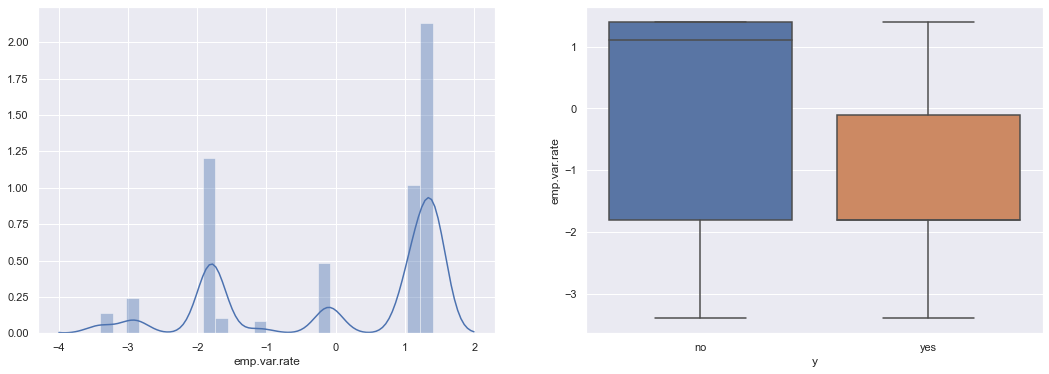

In [30]:
plot_unibi_num('emp.var.rate')

We can see a difference for emp.var.rate in the above plots, making this feature a possible good predictor of the target variable.

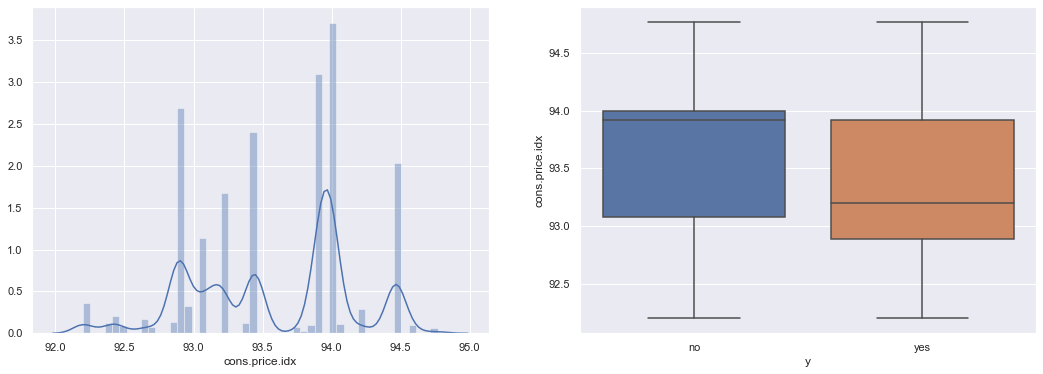

In [31]:
plot_unibi_num('cons.price.idx')

There's a clear difference in the median of the cons.price.idx as shown with the boxplots. The plots indicate that this feauture can also, be a good indicator of the target variable.

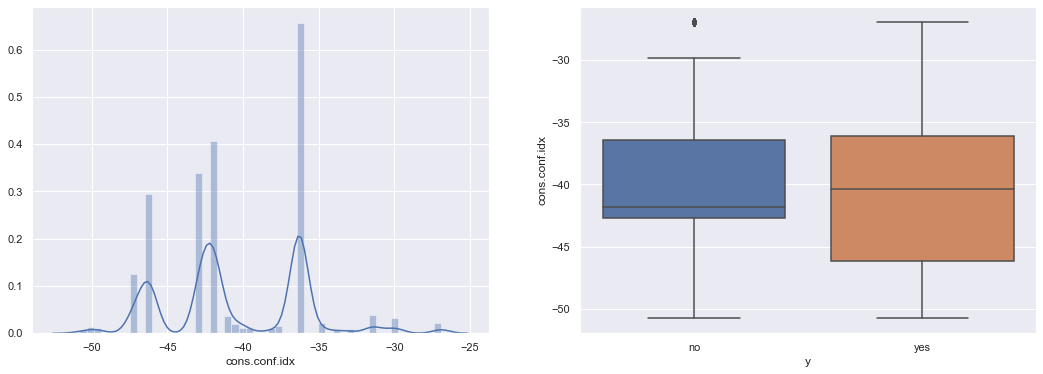

In [32]:
plot_unibi_num('cons.conf.idx')

The median for this feature is a little different between the yes and no target for subscription of term deposits. The overlap is also not as much and therefore, this feature can be a good predictor of our target variable.

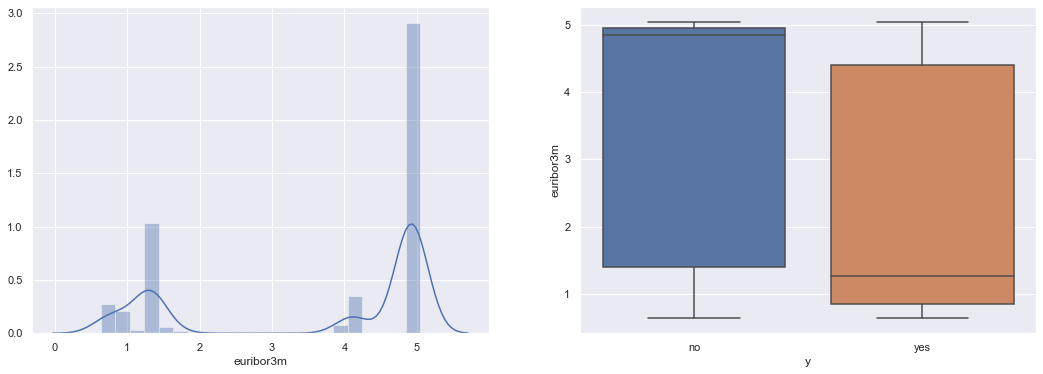

In [33]:
plot_unibi_num('euribor3m')

There is a clear difference in median for our classes with the non-subscription having a higher euribor3m median and subscriptions having a lower euribor3m median. As a result, this feature can be a good indicator of our target variable.

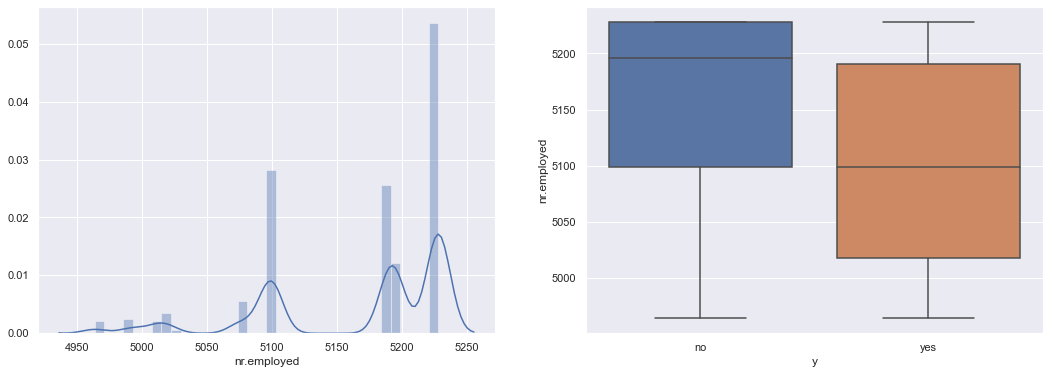

In [34]:
plot_unibi_num('nr.employed')

The overlap in this feature is small with a difference in the median of both classes and therefore, this feature can as well be a good predictor for our target variable.

### Correlation Matrix of the numerical features

<AxesSubplot:>

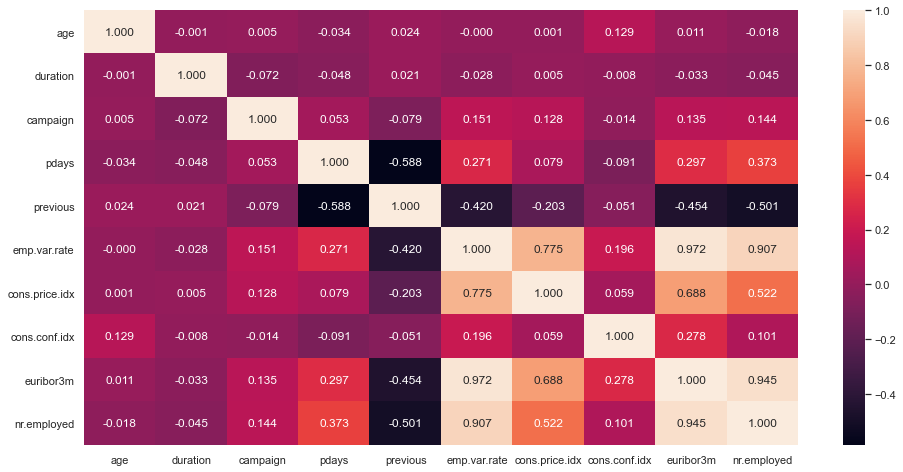

In [35]:
f, ax = plt.subplots(figsize = (16, 8))
corr = dataset.corr()
sns.heatmap(corr, annot = True, fmt = '.3f', annot_kws = {'size':12}, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

We can see a high positive correlation between emp.var.rate, euribor3m, nr.employed, and cons.price.index. The highest positive correlation of 0.972 is between emp.var.rate and euribor3m and the lowest correlation of -0.588 is between previous and pdays.

## Data Cleaning
After understanding our data, we can go ahead to clean the data by checking for any missing values, duplicated rows and outliers then dealing with this data as they may affect the effectiveness of our model creation.
### Missing Values

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no missing values in our dataset. Next we check for any duplicate rows.

In [37]:
dataset[dataset.duplicated()] 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicated rows, we can go ahead and remove those data from our dataset.

In [38]:
dataset = dataset.drop_duplicates()

#then we inspect the shape of our new dataset
dataset.shape

(41176, 21)

Finally, we deal with the outliers in our numerical features. 

From the univariate and bivariate analysis of numerical features, most of the features had outliers. We will deal with those outliers by replacing them with median values since they are many and with mean value in the case of `cons.conf.idx` since it has only one outlier.

The following defined functions will help us replace the outliers with meadian or mean and plot the features again to see the distribution

In [39]:
def replace_outlier(data, features, with_median=False, with_mean=False):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
    
        median = data[feature].quantile(0.50)
        mean = data[feature].mean()
    
        IQR = Q3 - Q1
    
        upper_whisker = Q3 + (1.5 * IQR)
        lower_whisker = Q1 - (1.5 * IQR)
    
        if with_median:
            data[feature] = np.where(data[feature] > upper_whisker, median, data[feature])
            data[feature] = np.where(data[feature] < lower_whisker, median, data[feature])
    
        if with_mean:
            data[feature] = np.where(data[feature] > upper_whisker, mean, data[feature])
            data[feature] = np.where(data[feature] < lower_whisker, mean, data[feature])
            
def plot_outliers(data, features):
    fig, ax = plt.subplots(len(features), figsize = (8, 40))
    
    for i, feature in enumerate(features):
        sns.boxplot(y = data[feature], ax = ax[i])
        ax[i].set_title('Box plot - {}'.format(feature), fontsize = 10)
        ax[i].set_xlabel(feature, fontsize = 8)
    
    plt.show()

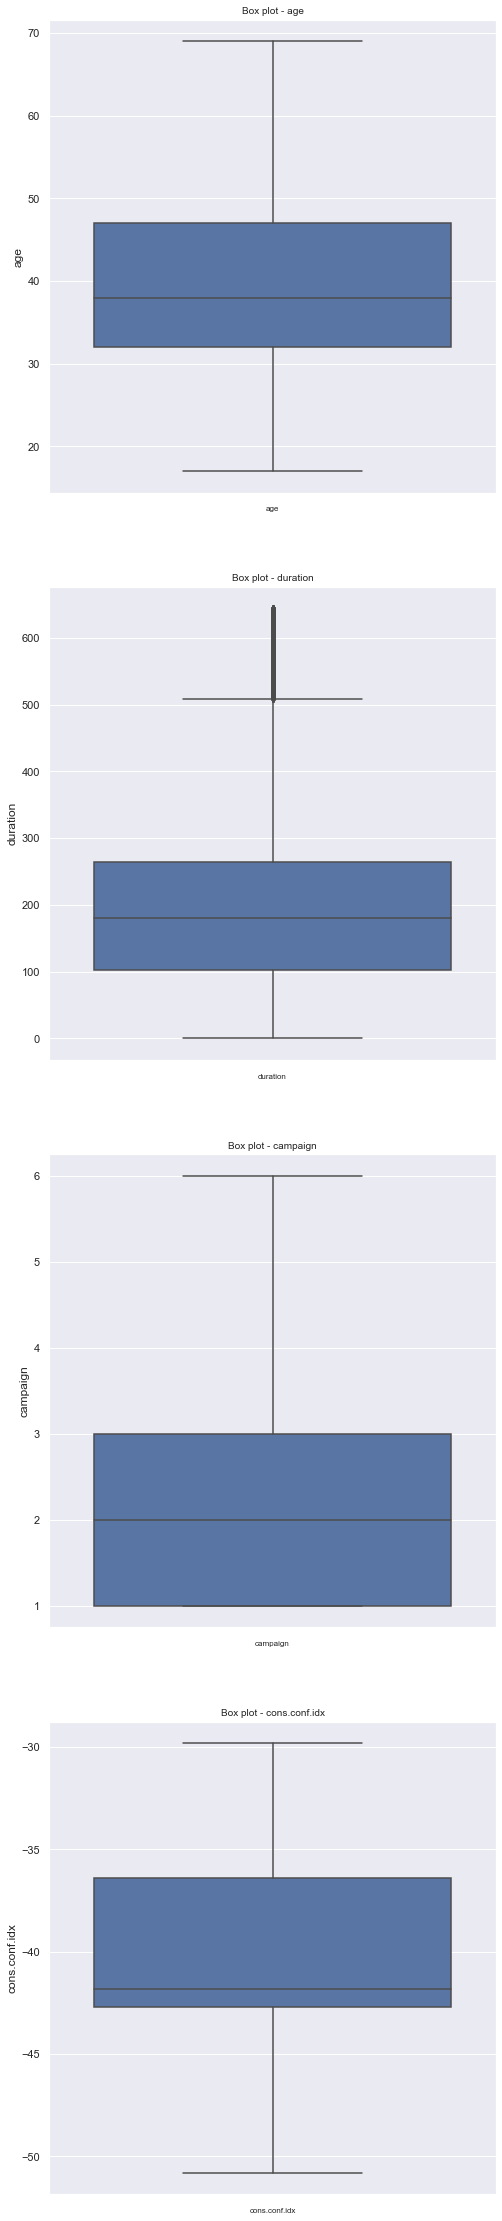

In [40]:
replace_outlier(dataset, ['age', 'duration', 'campaign'], with_median=True)
replace_outlier(dataset, ['cons.conf.idx'], with_mean=True)

plot_outliers(dataset, ['age', 'duration', 'campaign', 'cons.conf.idx'])

## Feature Extraction
Now that our data is cleaned we can go ahead and prepare the data for model training and testing. This will be achieved through data pre-processing and feature extraction.

### Data Pre-processing
Our dataset has 10 categorical features and we need to encode these data into a numerical form which the model can understand. For this project we will use `one hot encoding` to transform our categorical features to numerical form.
* **One hot encoding** - this is a popular encoding scheme used to deal with categorical features. For each category it creates a separate column with binary values (0 and 1). In each of these new columns there is a value of 1 if the corresponding category is present in row and 0 otherwise. For instance, in our marital feature, there is four possible status ('married', 'single', 'divorced', 'unknown'). One hot encoder creates a separate column for each of these unique instances and example in the married column where a customer had married it encodes with 1 and the rest is encoded with 0. One hot encoder does this for each unique instance in our categorical features.

First, let's separate our target variable from the rest of the data to differentiate it from one hot encoding since it is also categorical.

In [41]:
dataset_X = dataset.iloc[:, :-1]
target = dataset['y']

#we can also just change our target variable to binary.
#Changing no to 0 and yes to 1
target.replace({'no':0, 'yes':1}, inplace=True)

#we can then inspect the shape of our separated data.
print('Shape of X : ', dataset_X.shape)
print('Shape of target : ', target.shape)

Shape of X :  (41176, 20)
Shape of target :  (41176,)


#### Splitting data
Next we can split our data into training and testing sets in 9:1 ratio using the train_test_split function from sklearn

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_X, target, test_size=0.1)
print('Shape of X_train : ',X_train.shape, '\nShape of y_train : ', y_train.shape)
print('Shape of X_test : ',X_test.shape, '\nShape of y_test : ', y_test.shape)

Shape of X_train :  (37058, 20) 
Shape of y_train :  (37058,)
Shape of X_test :  (4118, 20) 
Shape of y_test :  (4118,)


#### One hot encoding
Then we proceed to encode our categorical features.

To encode the categorical feature, we use CountVectorizer, normally used for encoding text features into Bag Of Words representation. We use countVectorizer instead of other One hot encoding functions because of the problem of missing dimenstions in test dataset. This problem is commonly faced whe using pandas get_dummies function. The problem arises because when you are splitting data into train, test, there can be some categories of some features which will be in train and not be in the test dataset. Using pd.get_dummies ends up with different dimensions in train and test sets.
Therefore, we use CountVectorizer and fit_transform on the train set and transform on the test set as shown below.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [44]:
# then we call our one hot encoding function and pass our train and test datasets to it with the categorical columns.
#let's assign all our categorical features to the variable categorical_cols
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan', 'default', 'contact', 'poutcome', 'month', 'day_of_week']

#then we call the function and pass in the categorical_cols
OneHotEncoder(categorical_cols, X_train, X_test)

Encoding for feature:  job


C:\Users\kiiru\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  default
Encoding for feature:  contact
Encoding for feature:  poutcome
Encoding for feature:  month
Encoding for feature:  day_of_week


In [45]:
#we can then inspect the columns in our datasets.
print(X_train.shape)
print(X_test.shape)
print(X_train.columns.values)

(37058, 73)
(4118, 73)
['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'marital_unknown'
 'education_basic.4y' 'education_basic.6y' 'education_basic.9y'
 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'housing_no' 'housing_unknown' 'housing_yes'
 'loan_no' 'loan_unknown' 'loan_yes' 'default_no' 'default_unknown'
 'default_yes' 'contact_cellular' 'contact_telephone' 'poutcome_failure'
 'poutcome_nonexistent' 'poutcome_success' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun'

Notice from the above columns that we still have our original categorical features. We should drop the categorical features since the one hot encoded representations are added to the dataset.

In [46]:
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

#then we can inspect the shape of our dataset again
print(X_train.shape)
print(X_test.shape)

(37058, 63)
(4118, 63)


Now that our categorical features are dropped we are left with 63 columns in our data.

#### Normalization of Numerical features

We also have 10 numerical features measured at different scales and we will therefore rescale them using `StandardScaler()` so that the features can contribute equally to model fitting.

In [47]:
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()

numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
    
#normalizing train set
X_train = X_train.reset_index()
temp_df = X_train.filter(numerical_cols, axis = 1)
X_train = X_train.drop(numerical_cols, axis = 1)
   
cols = temp_df.values
    
temp_cols = scaler.fit_transform(cols)
temp_df = pd.DataFrame(temp_cols, columns = numerical_cols)
X_train = X_train.merge(temp_df, left_index=True, right_index=True)
X_train = X_train.drop(['index'], axis=1)
    
#normalizing test set
X_test = X_test.reset_index()
temp_df = X_test.filter(numerical_cols, axis = 1)
X_test = X_test.drop(numerical_cols, axis = 1)
    
cols = temp_df.values
    
temp_cols = scaler.fit_transform(cols)
temp_df = pd.DataFrame(temp_cols, columns = numerical_cols)
X_test = X_test.merge(temp_df, left_index=True, right_index=True)
X_test = X_test.drop(['index'], axis=1)

In [48]:
X_train.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,0,0,0,0,0,0,0,0,0,...,-0.061400,-0.903293,1.575852,0.195779,-0.34946,-0.117711,-0.651179,-0.305463,0.229598,0.397400
1,0,0,0,0,0,0,0,1,0,0,...,-0.685074,-1.417655,-0.034725,0.195779,-0.34946,0.838476,1.534009,-0.260037,0.770579,0.844356
2,1,0,0,0,0,0,0,0,0,0,...,0.666219,-0.925337,0.770563,0.195779,-0.34946,-0.117711,-0.651179,-0.305463,0.327644,0.397400
3,1,0,0,0,0,0,0,0,0,0,...,-0.892965,0.456093,-0.840014,0.195779,-0.34946,-0.117711,-0.651179,-0.305463,0.261319,0.397400
4,0,0,1,0,0,0,0,0,0,0,...,-0.789020,-1.138430,-0.840014,0.195779,-0.34946,-1.137644,0.777399,0.534927,-1.567520,-2.428246


Finally, we have a dataset fit enough to train a machine learning model. However, we have a total of 63 columns!! Let's explore a number of dimensionality reduction techniques to choose the best features that will be a correct representation of the entire dataset. The dimensionality reduction techniques explored in this project are:
* T-SNE (t-distributed Stochastic Neighbor Embedding) - 
* PCA (Principal Component Analysis)
* Autoencoders

#### T-SNE
T-SNE is a non-linear dimensionality reduction technique used to visualize high dimensional datasets. The technique works by minimizing the divergence between a distribution constituted by the pairwise probability similarities of the input features in the original high dimensional space and its equivalent in the reduced low dimensional space. T-SNE then makes use of the Kullbac-Leiber (KL) divergence to measure the dissimilarity of the two different distributions. The KL divergence is then minimized using gradient descent.

We will apply T-SNE to both our training and testing test using 2 and 3 features

In [51]:
from sklearn.manifold import TSNE
import time

#we start by reducing the features to 3 dimensions

#applying T-SNE on train dataset
start = time.process_time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_train)
print(time.process_time() - start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 37058 samples in 15.139s...
[t-SNE] Computed neighbors for 37058 samples in 429.317s...
[t-SNE] Computed conditional probabilities for sample 1000 / 37058
[t-SNE] Computed conditional probabilities for sample 2000 / 37058
[t-SNE] Computed conditional probabilities for sample 3000 / 37058
[t-SNE] Computed conditional probabilities for sample 4000 / 37058
[t-SNE] Computed conditional probabilities for sample 5000 / 37058
[t-SNE] Computed conditional probabilities for sample 6000 / 37058
[t-SNE] Computed conditional probabilities for sample 7000 / 37058
[t-SNE] Computed conditional probabilities for sample 8000 / 37058
[t-SNE] Computed conditional probabilities for sample 9000 / 37058
[t-SNE] Computed conditional probabilities for sample 10000 / 37058
[t-SNE] Computed conditional probabilities for sample 11000 / 37058
[t-SNE] Computed conditional probabilities for sample 12000 / 37058
[t-SNE] Computed conditional probabilities for

In [275]:
#applying T-SNE with 3 dimensions on test dataset
start = time.process_time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne_3test = tsne.fit_transform(X_test)
print(time.process_time() - start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4118 samples in 0.402s...
[t-SNE] Computed neighbors for 4118 samples in 7.908s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4118
[t-SNE] Computed conditional probabilities for sample 2000 / 4118
[t-SNE] Computed conditional probabilities for sample 3000 / 4118
[t-SNE] Computed conditional probabilities for sample 4000 / 4118
[t-SNE] Computed conditional probabilities for sample 4118 / 4118
[t-SNE] Mean sigma: 1.147317
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.372543
[t-SNE] KL divergence after 300 iterations: 1.914248
153.609375


In [276]:
#then we use T-SNE to reduce to 2 dimensions

#T-SNE on train set
start = time.process_time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne_2train = tsne.fit_transform(X_train)
print(time.process_time() - start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 37058 samples in 7.179s...
[t-SNE] Computed neighbors for 37058 samples in 337.028s...
[t-SNE] Computed conditional probabilities for sample 1000 / 37058
[t-SNE] Computed conditional probabilities for sample 2000 / 37058
[t-SNE] Computed conditional probabilities for sample 3000 / 37058
[t-SNE] Computed conditional probabilities for sample 4000 / 37058
[t-SNE] Computed conditional probabilities for sample 5000 / 37058
[t-SNE] Computed conditional probabilities for sample 6000 / 37058
[t-SNE] Computed conditional probabilities for sample 7000 / 37058
[t-SNE] Computed conditional probabilities for sample 8000 / 37058
[t-SNE] Computed conditional probabilities for sample 9000 / 37058
[t-SNE] Computed conditional probabilities for sample 10000 / 37058
[t-SNE] Computed conditional probabilities for sample 11000 / 37058
[t-SNE] Computed conditional probabilities for sample 12000 / 37058
[t-SNE] Computed conditional probabilities for 

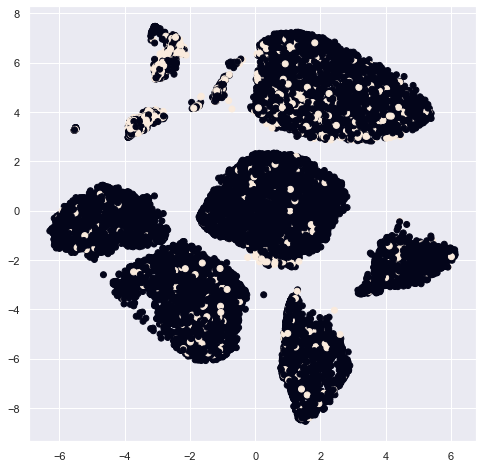

In [277]:
#plotting T-SNE 2D train dataset
plt.figure(figsize=(8,8))
plt.scatter(X_tsne_2train[:, 0], X_tsne_2train[:, 1], c=y_train.values)
plt.show()

In [278]:
#applying T-SNE with 2 dimenstions on test dataset
start = time.process_time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne_2test = tsne.fit_transform(X_test)
print(time.process_time() - start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4118 samples in 0.371s...
[t-SNE] Computed neighbors for 4118 samples in 8.382s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4118
[t-SNE] Computed conditional probabilities for sample 2000 / 4118
[t-SNE] Computed conditional probabilities for sample 3000 / 4118
[t-SNE] Computed conditional probabilities for sample 4000 / 4118
[t-SNE] Computed conditional probabilities for sample 4118 / 4118
[t-SNE] Mean sigma: 1.147317
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.407791
[t-SNE] KL divergence after 300 iterations: 2.090208
49.75


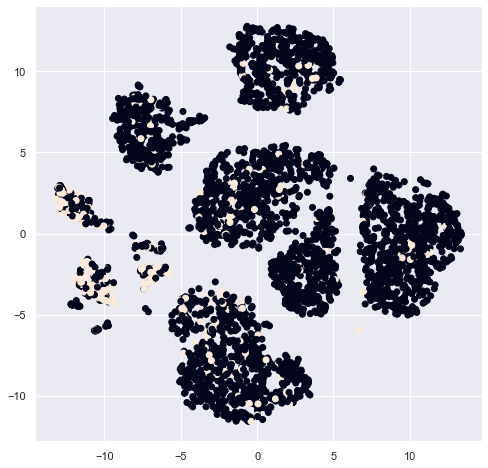

In [279]:
#plotting T-SNE 2D test dataset
plt.figure(figsize=(8,8))
plt.scatter(X_tsne_2test[:, 0], X_tsne_2test[:, 1], c=y_test.values)
plt.show()

#### PCA


In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_2train = pca.fit_transform(X_train)
PCA_df_2train = pd.DataFrame(data = X_pca_2train, columns = ['PC1', 'PC2'])
PCA_df_2train = pd.concat([PCA_df_2train, y_train], axis = 1)
print(pca.explained_variance_ratio_)
PCA_df_2train.head()

[0.26517376 0.09219457]


,PC1,PC2,y
0,-0.073631,-0.966235,0.0
1,-1.979810,0.003858,0.0
2,-0.280872,-0.659513,0.0
3,0.144538,-0.790829,0.0
4,1.784574,-0.298424,0.0


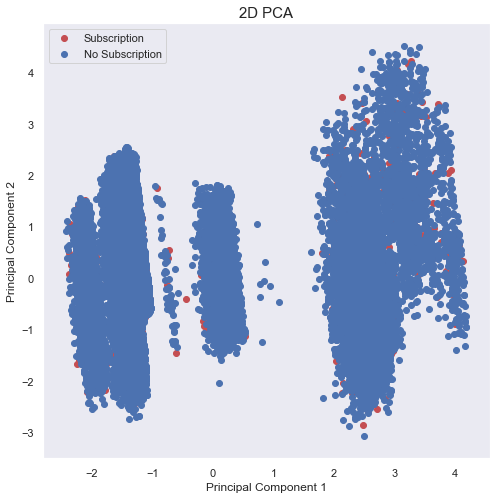

In [317]:
plt.figure(figsize=(8, 8))

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df_2train.loc[PCA_df_2train['y'] == clas, 'PC1'], 
                PCA_df_2train.loc[PCA_df_2train['y'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Subscription', 'No Subscription'])
plt.grid()

We can explore how much of the original data variance was preserved in the 2D PCA by using the explained_variance_ratio.

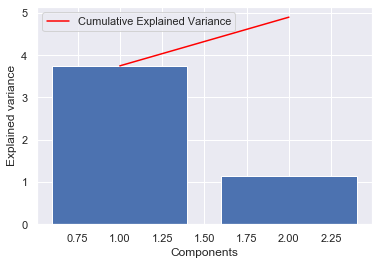

In [318]:
#explained_variance_ plot
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

Text(0, 0.5, 'cumulative explained variance')

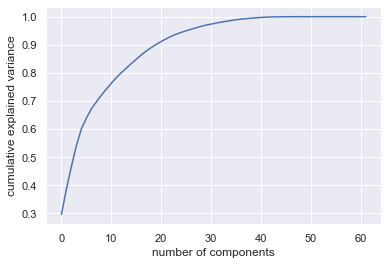

In [319]:
pca = PCA()
pca_data = pca.fit_transform(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [54]:
pca10 = PCA(n_components=18)
X_pca_10train = pca10.fit_transform(X_train)
PCA_df_10train = pd.DataFrame(data = X_pca_10train, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
PCA_df_10train = pd.concat([PCA_df_10train, y_train], axis = 1)
print(pca10.explained_variance_ratio_)
PCA_df_10train.head()

[0.26517376 0.09219457 0.07193928 0.06615777 0.06261986 0.05879004
 0.04435676 0.03065541 0.02977757 0.02575339 0.01962488 0.01761082
 0.01725352 0.01670016 0.01603014 0.01403651 0.01322986 0.01280209]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,y
0,-0.073631,-0.966237,0.354187,1.626024,-0.150188,0.685297,-0.872487,-0.502314,-0.136992,-0.503308,0.466280,-0.180781,-0.371208,-0.381909,-0.105434,0.262770,0.048717,-0.027006,0.0
1,-1.979810,0.003864,1.532884,0.665638,-0.556406,-1.000410,0.919256,0.579794,-0.302998,-0.648920,0.358528,-0.760684,-0.127180,-0.085305,0.556253,-0.115271,0.004808,-0.153295,0.0
2,-0.280872,-0.659508,-0.789203,1.302331,0.037652,-0.160144,-0.562289,0.839460,-0.301655,0.398865,0.330411,0.432141,-0.504376,-0.402456,1.204832,-0.423868,-0.564214,-0.544777,0.0
3,0.144538,-0.790836,0.744624,-1.147727,-0.625664,0.110490,-0.974359,0.768497,-0.411067,-0.676413,0.191159,0.767375,-0.698134,0.916817,-0.386242,0.014659,0.680731,-0.496674,0.0
4,1.784574,-0.298414,0.477381,-0.092221,-1.550660,-0.165906,2.195385,-1.004531,-0.339455,-0.872698,0.253747,-0.297484,1.467396,0.189416,0.152395,-0.131313,0.000628,0.240684,0.0


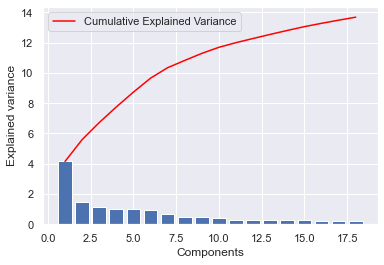

In [55]:
#explained_variance_ plot
plt.bar(range(1,len(pca10.explained_variance_ )+1),pca10.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca10.explained_variance_ )+1),
         np.cumsum(pca10.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [57]:
X_pca_10test = pca10.fit_transform(X_test)
PCA_df_10test = pd.DataFrame(data = X_pca_10test, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
print(pca10.explained_variance_ratio_)
PCA_df_10test.head()

[0.26574601 0.08999918 0.07209105 0.066321   0.06121774 0.05937214
 0.0450713  0.03205169 0.02991406 0.02491934 0.02010948 0.01815185
 0.01749431 0.01707007 0.01591014 0.01411058 0.01298642 0.01274066]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-1.920465,-0.230147,-2.336410,0.991507,-1.309715,0.475189,0.790131,0.206524,-0.528353,-0.281856,0.175060,0.497941,0.058053,-0.026403,0.221128,0.215920,-0.146407,0.165274
1,2.008331,-1.938163,-0.004533,1.526197,0.074906,-0.598109,0.538971,-0.025114,-0.728939,1.063217,-0.527636,-0.426425,0.011506,1.026980,-0.583617,-0.062779,0.966570,-0.203170
2,-1.386274,-0.806936,-1.455850,1.529255,-0.941822,0.105251,-1.055492,-0.463456,0.392357,-0.312613,0.442098,0.507601,0.443336,-0.040854,0.673834,-0.103662,0.861862,-0.215128
3,0.051018,-0.626401,-0.362023,-0.825318,-0.347968,0.289694,-1.093740,-0.382616,0.418311,-0.067479,-0.725597,-0.867208,-0.140613,0.786143,-0.553117,-0.084555,-0.026811,0.096080
4,2.048265,-1.649269,1.239052,0.533139,-0.242197,0.700343,0.402768,-0.465385,-0.301416,0.080725,-0.358388,-0.061216,-0.199056,0.678925,-0.301369,0.377642,-0.635262,-0.579179


#### Autoencoders
Autoencoders are a family of Machine Learning algorithms which can be used as a dimensionality reduction technique. The main difference between Autoencoders and other dimensionality reduction techniques is that Autoencoders use non-linear transformations to project data from a high dimension to a lower one.

There exists different types of Autoencoders such as: Denoising Autoencoder, Variational Autoencoder, Convolutional Autoendocer, Sparse Autoencoder etc.

In this project, we will build a basic Autoencoder whose architecture is broken down into 2 main components.
* Encoder: takes the input data and compress it, so that to remove all the possible noise and unhelpful information.
* Decoder: takes as input the encoded latent space and tries to reproduce the original Autoencoder input using just it's compressed form.

In [303]:
from keras.layers import Input, Dense
from keras.models import Model

X = pd.concat([X_train, X_test], ignore_index=True)

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 30,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae3 = encoder.predict(X)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

As seen above, autoencoders can be implemented in Python using Keras. In our case, we specify in the encoding layer the number of features we want our data to be reduced to.
I also concatenated our training and testing set back to original set because Autoencoder take X (the input feature) as both the feature and the label (X,Y).

For this project, I've used ReLu as the activation function for the encoding stage and Softmax for the decoding stage because they are non-linear activation functions and we wanted to achieve a non-linear dimensionality reduction.

### Balancing Classes

In [73]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 0)

columns = X_train.columns
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

#we can inspect the numbers of our data
print('length of oversampled data is ', len(os_data_X))
print('Number of no subscription in oversampled data ', len(os_data_y['y']==0))
print('Number of subscription ', len(os_data_y['y']==1))
print('Proportion of no subscription data in oversampled data is ', len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print('Proportion of subscription data in oversampled data is ', len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  65728
Number of no subscription in oversampled data  65728
Number of subscription  65728
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfectly balanced data. The oversampling has only been applied to the training to avoid creating synthetic observations in the test data thus avoiding overfitting.

Next, we select a few features, starting with 20 since according to our PCA, 20 components would represent approximately 90% of the data. We will select our features using RFE.
#### RFE

In [77]:
full_set = pd.concat([X_train, X_test], ignore_index=True)
full_target = pd.concat([y_train, y_test], ignore_index=True)
full_target.shape

(41176,)

In [79]:
full_set_cols = full_set.columns.values.tolist()

from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
rank = rfe.ranking_
print(rank)

C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[41  9 34 16 33  1 29 25  1 30  7 24 19 20 27  1  2 26 12 11  1 13 39 40
 18  6 32 36 21 42  1 15 14  1  1  1 28  1  8  1  1 22  1  1  1  1  4 38
 43  1 23 35 10 31 37  1 17  1  1  5  1  3]


C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [83]:
full_set.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'default_no', 'default_unknown',
       'default_yes', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week

RFE has helped us select the following features: 'job_retired', 'job_student', 'marital_unknown', 'education_illetrate', 'default_no', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_success', 'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'day_of_week_mon', 'pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m'.

In [85]:
cols = ['job_retired', 'job_student', 'marital_unknown', 'education_illiterate', 'default_no', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_success', 'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'day_of_week_mon', 'pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m']
X_os = os_data_X[cols]
y_os = os_data_y['y']

In [89]:
import statsmodels.api as sm
logit_model=sm.Logit(y_os, X_os)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.523926
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.244     
Dependent Variable:   y                 AIC:               68913.1826
Date:                 2020-08-29 22:52  BIC:               69095.0482
No. Observations:     65728             Log-Likelihood:    -34437.   
Df Model:             19                LL-Null:           -45559.   
Df Residuals:         65708             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
job_retired          -0.2335   0.0473  -4.9404 0.0000 -0.3262 -0.1409
job_student     

we can see that the p-value of most of our features less than 0.05 except for 'education_illetrate' and 'month_dec'. We will therefore, remove them from our training features.

In [90]:
cols = ['job_retired', 'job_student', 'marital_unknown', 'default_no', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_success', 'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'day_of_week_mon', 'pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m']
X_os = os_data_X[cols]
y_os = os_data_y['y']

#then we inspect the Logit table again
logit_model=sm.Logit(y_os, X_os)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.523950
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.244     
Dependent Variable:  y                AIC:              68912.3278
Date:                2020-08-29 23:00 BIC:              69076.0068
No. Observations:    65728            Log-Likelihood:   -34438.   
Df Model:            17               LL-Null:          -45559.   
Df Residuals:        65710            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
job_retired       -0.2347   0.0473  -4.9639 0.0000 -0.3273 -0.1420
job_student       -0.3342   0.0627  -5.3291 0.0000 -0

## Development of Robust Machine Learning Algorithms
First we test a model using the original dataset containing the duration feature as it is indicated it wil directly affect the target and maybe do a comparison of the models performance withouth the feature.

#### Model training with 'Duration' column

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict_proba(X_test)

print('AUC score with duration columns :', roc_auc_score(y_test, y_pred_logreg[:,1]))

AUC score with duration columns : 0.8201323352615656


C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Model training without 'Duration' column
Then we remove the duration column from our dataset and train the model again without the 'Duration column'

In [75]:
#Removing duration feature from dataset

#From train
X_train = X_train.drop('duration', axis=1)
print('Train set shape :', X_train.shape)

#From test
X_test = X_test.drop('duration', axis=1)
print('Test set shape :', X_test.shape)

Train set shape : (37058, 62)
Test set shape : (4118, 62)


In [76]:
# then we train the model without duration column
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict_proba(X_test)

print('AUC score without duration columns : ', roc_auc_score(y_test, y_pred_logreg[:, 1]))

AUC score without duration columns :  0.7913336616732488


C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Notice that our score reduces from 82% to 79%, but this was expected.

In [78]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 5-fold cross validation
logreg_cv_scores = cross_val_score(logreg, full_set, full_target, cv=5)
print('Cross-validated scores:', logreg_cv_scores)

# Make cross validated predictions
logreg_cv_y_pred = cross_val_predict(logreg, full_set, full_target, cv=5)

C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Cross-validated scores: [0.82649344 0.82683667 0.83011536 0.83351548 0.82343655]


C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Using 5-fold cross-validation our accuracy actually increases to perform as better as the model with the 'duration' column with 82.2% - 83.3% range.  We can then continue without the 'duration' column to test other algorithms.

Before we continue let's import the modules that will help us calculate accuracy scores.

In [94]:
#we will need to come up with confusion matrix for our models
from sklearn.metrics import confusion_matrix

#we also need to compute precision, recall, F-measure and support
from sklearn.metrics import classification_report

### Multilayer Perceptron
First we test the model against our original data

In [96]:
from sklearn.neural_network import MLPClassifier

mlpclf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_mlp = mlpclf.predict_proba(X_test)

print('Accuracy score : ', mlpclf.score(X_test, y_test))

Accuracy score :  0.8943661971830986


C:\Users\kiiru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [115]:
print('AUC score:', roc_auc_score(y_test, y_pred_mlp[:,1]))

AUC score: 0.7731940030040043


In [122]:
logit_roc_auc = roc_auc_score(y_test, mlpclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlpclf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('MLP_ROC')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 18 is different from 62)

Then test the model again against the oversampled and feature extracted data and compare the scores..

In [100]:
cols = ['job_retired', 'job_student', 'marital_unknown', 'default_no', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_success', 'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'day_of_week_mon', 'pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m']

X_test_os = X_test[cols]

In [101]:
from sklearn.neural_network import MLPClassifier

mlpclf = MLPClassifier(random_state=1, max_iter=300).fit(X_os, y_os)
y_pred_mlp = mlpclf.predict_proba(X_test_os)

print('Accuracy score : ', mlpclf.score(X_test, y_test))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 18 is different from 62)

#### XGBoost

In [112]:
import xgboost as xgb
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

xg_model = regressor.fit(X_train, y_train)

xg_y_pred = regressor.predict(X_test)

In [114]:
# Perform 5-fold cross validation
xg_cv_scores = cross_val_score(xg_model, full_set, full_target, cv=5)
print('Cross-validated scores:', xg_cv_scores)

# Make cross validated predictions
xg_cv_y_pred = cross_val_predict(xg_model, full_set, full_target, cv=5)

Cross-validated scores: [0.22346614 0.23616276 0.22430663 0.2268626  0.21715453]


#### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=0)
rf_model = rfclf.fit(X_train, y_train)

y_pred_rf=rfclf.predict(X_test)

print('Accuracy score : ', rf_model.score(X_test,y_test))

Accuracy score :  0.7566779990286547


In [105]:
target = np.array(y_test)
rf_prediction = np.array(y_pred_rf)
print('Confusion matrix : ', confusion_matrix(target, rf_prediction))
print(classification_report(y_test, y_pred_rf))

Confusion matrix :  [[2806  867]
 [ 135  310]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      3673
           1       0.26      0.70      0.38       445

    accuracy                           0.76      4118
   macro avg       0.61      0.73      0.62      4118
weighted avg       0.88      0.76      0.80      4118



3116 correct predictions and 1002 incorrect predictions

In [106]:
# Perform 5-fold cross validation
rfclf_cv_scores = cross_val_score(rf_model, full_set, full_target, cv=5)
print('Cross-validated scores:', rfclf_cv_scores)

# Make cross validated predictions
rfclf_cv_y_pred = cross_val_predict(rf_model, full_set, full_target, cv=5)

Cross-validated scores: [0.74696455 0.75179114 0.74450516 0.79368549 0.74814815]


#### Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')

dt_model = dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print('Accuracy Score :', dt_model.score(X_test, y_test))

Accuracy Score : 0.8305002428363283


In [108]:
target = np.array(y_test)
dt_prediction = np.array(y_pred_dt)
print(confusion_matrix(target, dt_prediction))

[[3270  403]
 [ 295  150]]


3420 correct predictions and 698 incorrect predictions

In [109]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3673
           1       0.27      0.34      0.30       445

    accuracy                           0.83      4118
   macro avg       0.59      0.61      0.60      4118
weighted avg       0.85      0.83      0.84      4118



In [110]:
# Perform 5-fold cross validation
dt_cv_scores = cross_val_score(dt_model, full_set, full_target, cv=5)
print('Cross-validated scores:', dt_cv_scores)

# Make cross validated predictions
dt_cv_y_pred = cross_val_predict(dt_model, full_set, full_target, cv=5)

Cross-validated scores: [0.83960661 0.84201579 0.84529447 0.84128719 0.83424408]
